
# <span style="color:rgb(213,80,0)">Analysis of transformed Airline data.</span>

This file creates Figures A.50\-52

## Data loading

the original airline data (not contaminated)


In [1]:
airlines = ...
    [112  115  145  171  196  204  242  284  315  340  360  417    % Jan
    118  126  150  180  196  188  233  277  301  318  342  391    % Feb
    132  141  178  193  236  235  267  317  356  362  406  419    % Mar
    129  135  163  181  235  227  269  313  348  348  396  461    % Apr
    121  125  172  183  229  234  270  318  355  363  420  472    % May
    135  149  178  218  243  264  315  374  422  435  472  535    % Jun
    148  170  199  230  264  302  364  413  465  491  548  622    % Jul
    148  170  199  242  272  293  347  405  467  505  559  606    % Aug
    136  158  184  209  237  259  312  355  404  404  463  508    % Sep
    119  133  162  191  211  229  274  306  347  359  407  461    % Oct
    104  114  146  172  180  203  237  271  305  310  362  390    % Nov
    118  140  166  194  201  229  278  306  336  337  405  432 ]; % Dec
Y=(airlines(:));

prin=0;

## Create Figure A.50

the model


In [2]:
model           = struct;
model.trend     = 1;     % linear trend
model.seasonal  = 102;   % two harmonics with time varying seasonality
model.s         = 12;    % monthly time series
model.lshift    = 0;     % no level shift

% Default h is round(nT*0.75), i.e 25% breakdown point
outLTS102 = LTSts(Y,'model',model,'plots',1,'conflev',0.99,'msg',0,'dispresults',true);

                      Coeff                   SE                     t                    pval         
                __________________    ___________________    _________________    _____________________
    b_trend1      91.9378377340833       2.78568676914486     33.0036523676731      4.5293272888948e-67
    b_trend2      2.56179451763553     0.0371115356953185     69.0296014335696    2.58892079754274e-108
    b_cos1       -12.8036213620713       3.46013022562833    -3.70032933073966      0.00031091686407571
    b_sin1       -4.93482459761225        1.4234799148232    -3.46673286094464     0.000704115476337839
    b_cos2       -1.97235335343784       0.94193090269177    -2.09394696341464       0.0381071982726083
    b_sin2        7.26210314969038       2.00154947765955     3.62824063594077     0.000401750828436758
    b_varaml    0.0232085032918398    0.00960306410667153     2.41678104342927       0.0169747026376491


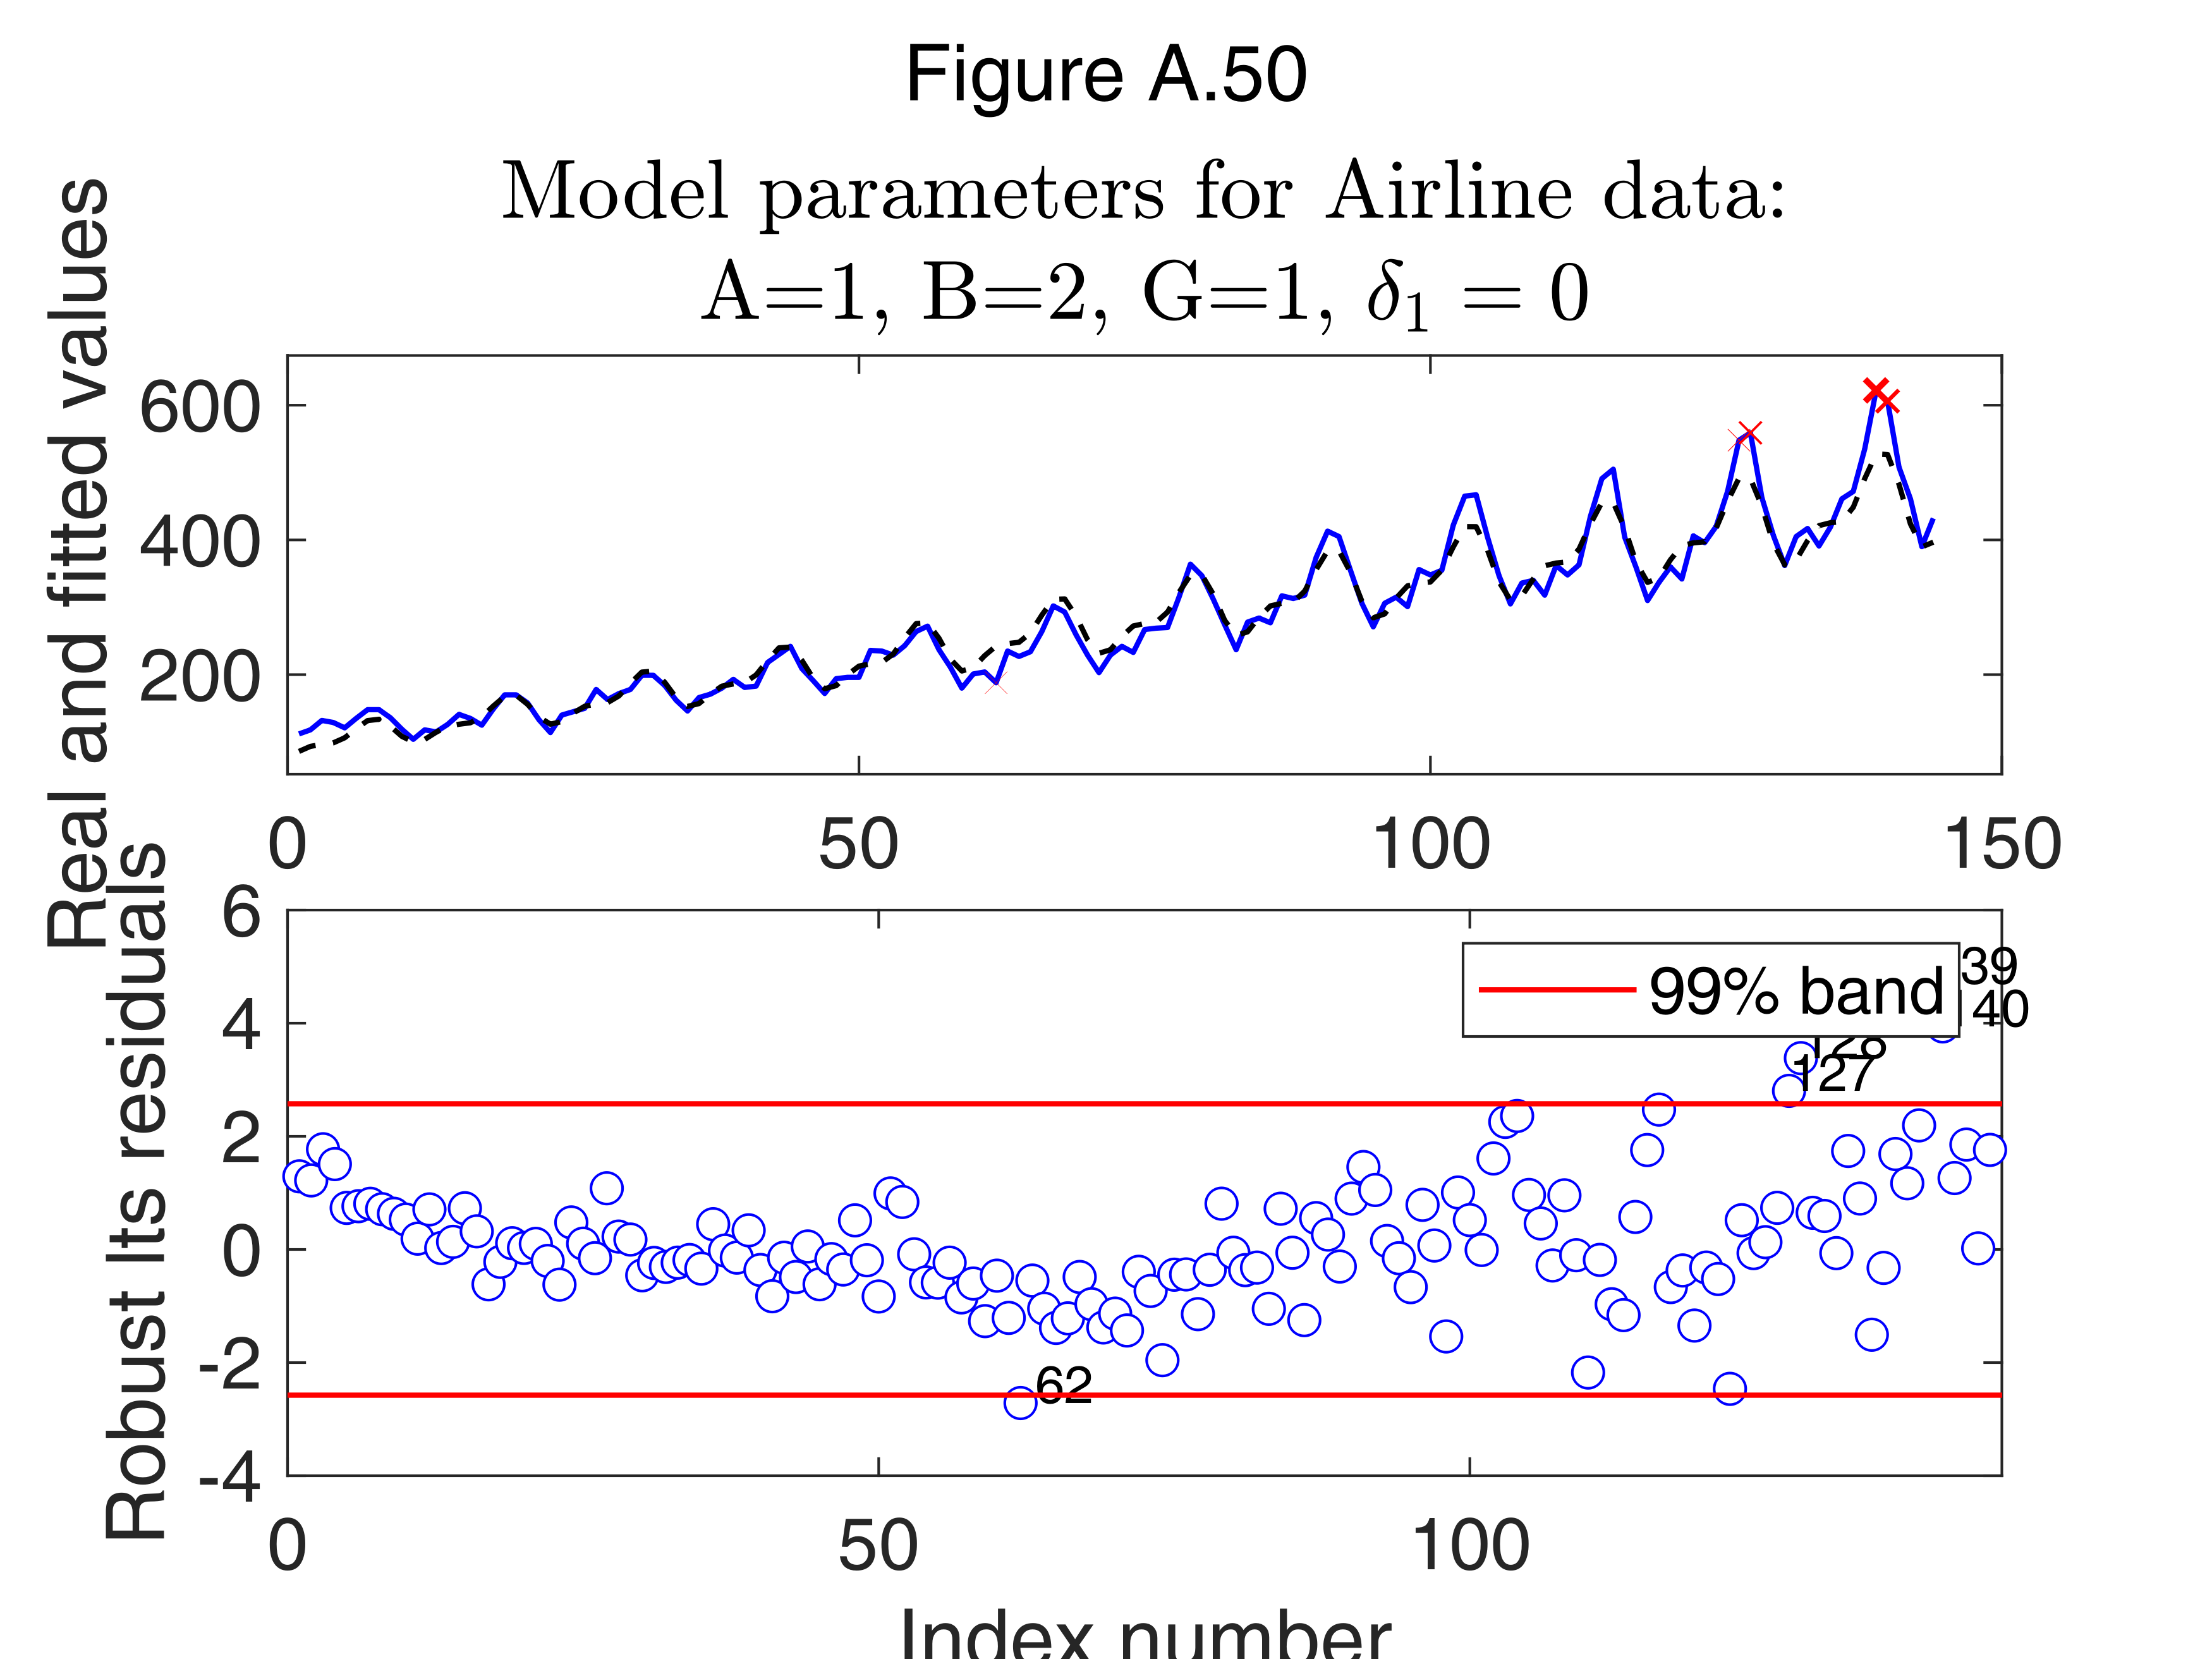

In [3]:
titl = {'Model parameters for Airline data:' , 'A=1, B=2, G=1,  !!!EQ_1!!! '};
title(findobj(gcf,'Tag','LTSts:ts'),titl,'interpreter','LaTeX','FontSize',16);

if prin==1
    % print to postscript
    print -depsc ch8_problem5_102.eps;
else
    sgtitle('Figure A.50')
    set(gcf,"Name",'Figure A.50')
end

## Create Figure A.51

quadratic grow of amplitude


In [4]:
model.seasonal  = 202;
outLTS202 = LTSts(Y,'model',model,'plots',1,'conflev',0.99,'msg',0,'dispresults',true);

                       Coeff                     SE                     t                    pval        
                ____________________    ____________________    _________________    ____________________
    b_trend1        101.149989881557        2.55529678268571      39.584439101921    1.62732619685209e-76
    b_trend2        2.30849617363973      0.0421175281545782     54.8108180795219    1.35254083713611e-94
    b_cos1          -20.969206952847         4.7124104559959    -4.44978364016796     1.7734499251644e-05
    b_sin1         -4.67416671139409         1.1651450317184    -4.01166085264121    9.90381274512809e-05
    b_cos2          -5.6203074082122        1.39495280195606    -4.02903051653876    9.27254994466604e-05
    b_sin2           8.9342647934989        2.07090300629068     4.31418794910226    3.05908822894559e-05
    b_varaml     -0.0175480834219377     0.00461326828982348    -3.80382893850927    0.000214457909983057
    b_varam2    0.000466910173743086    7.5219


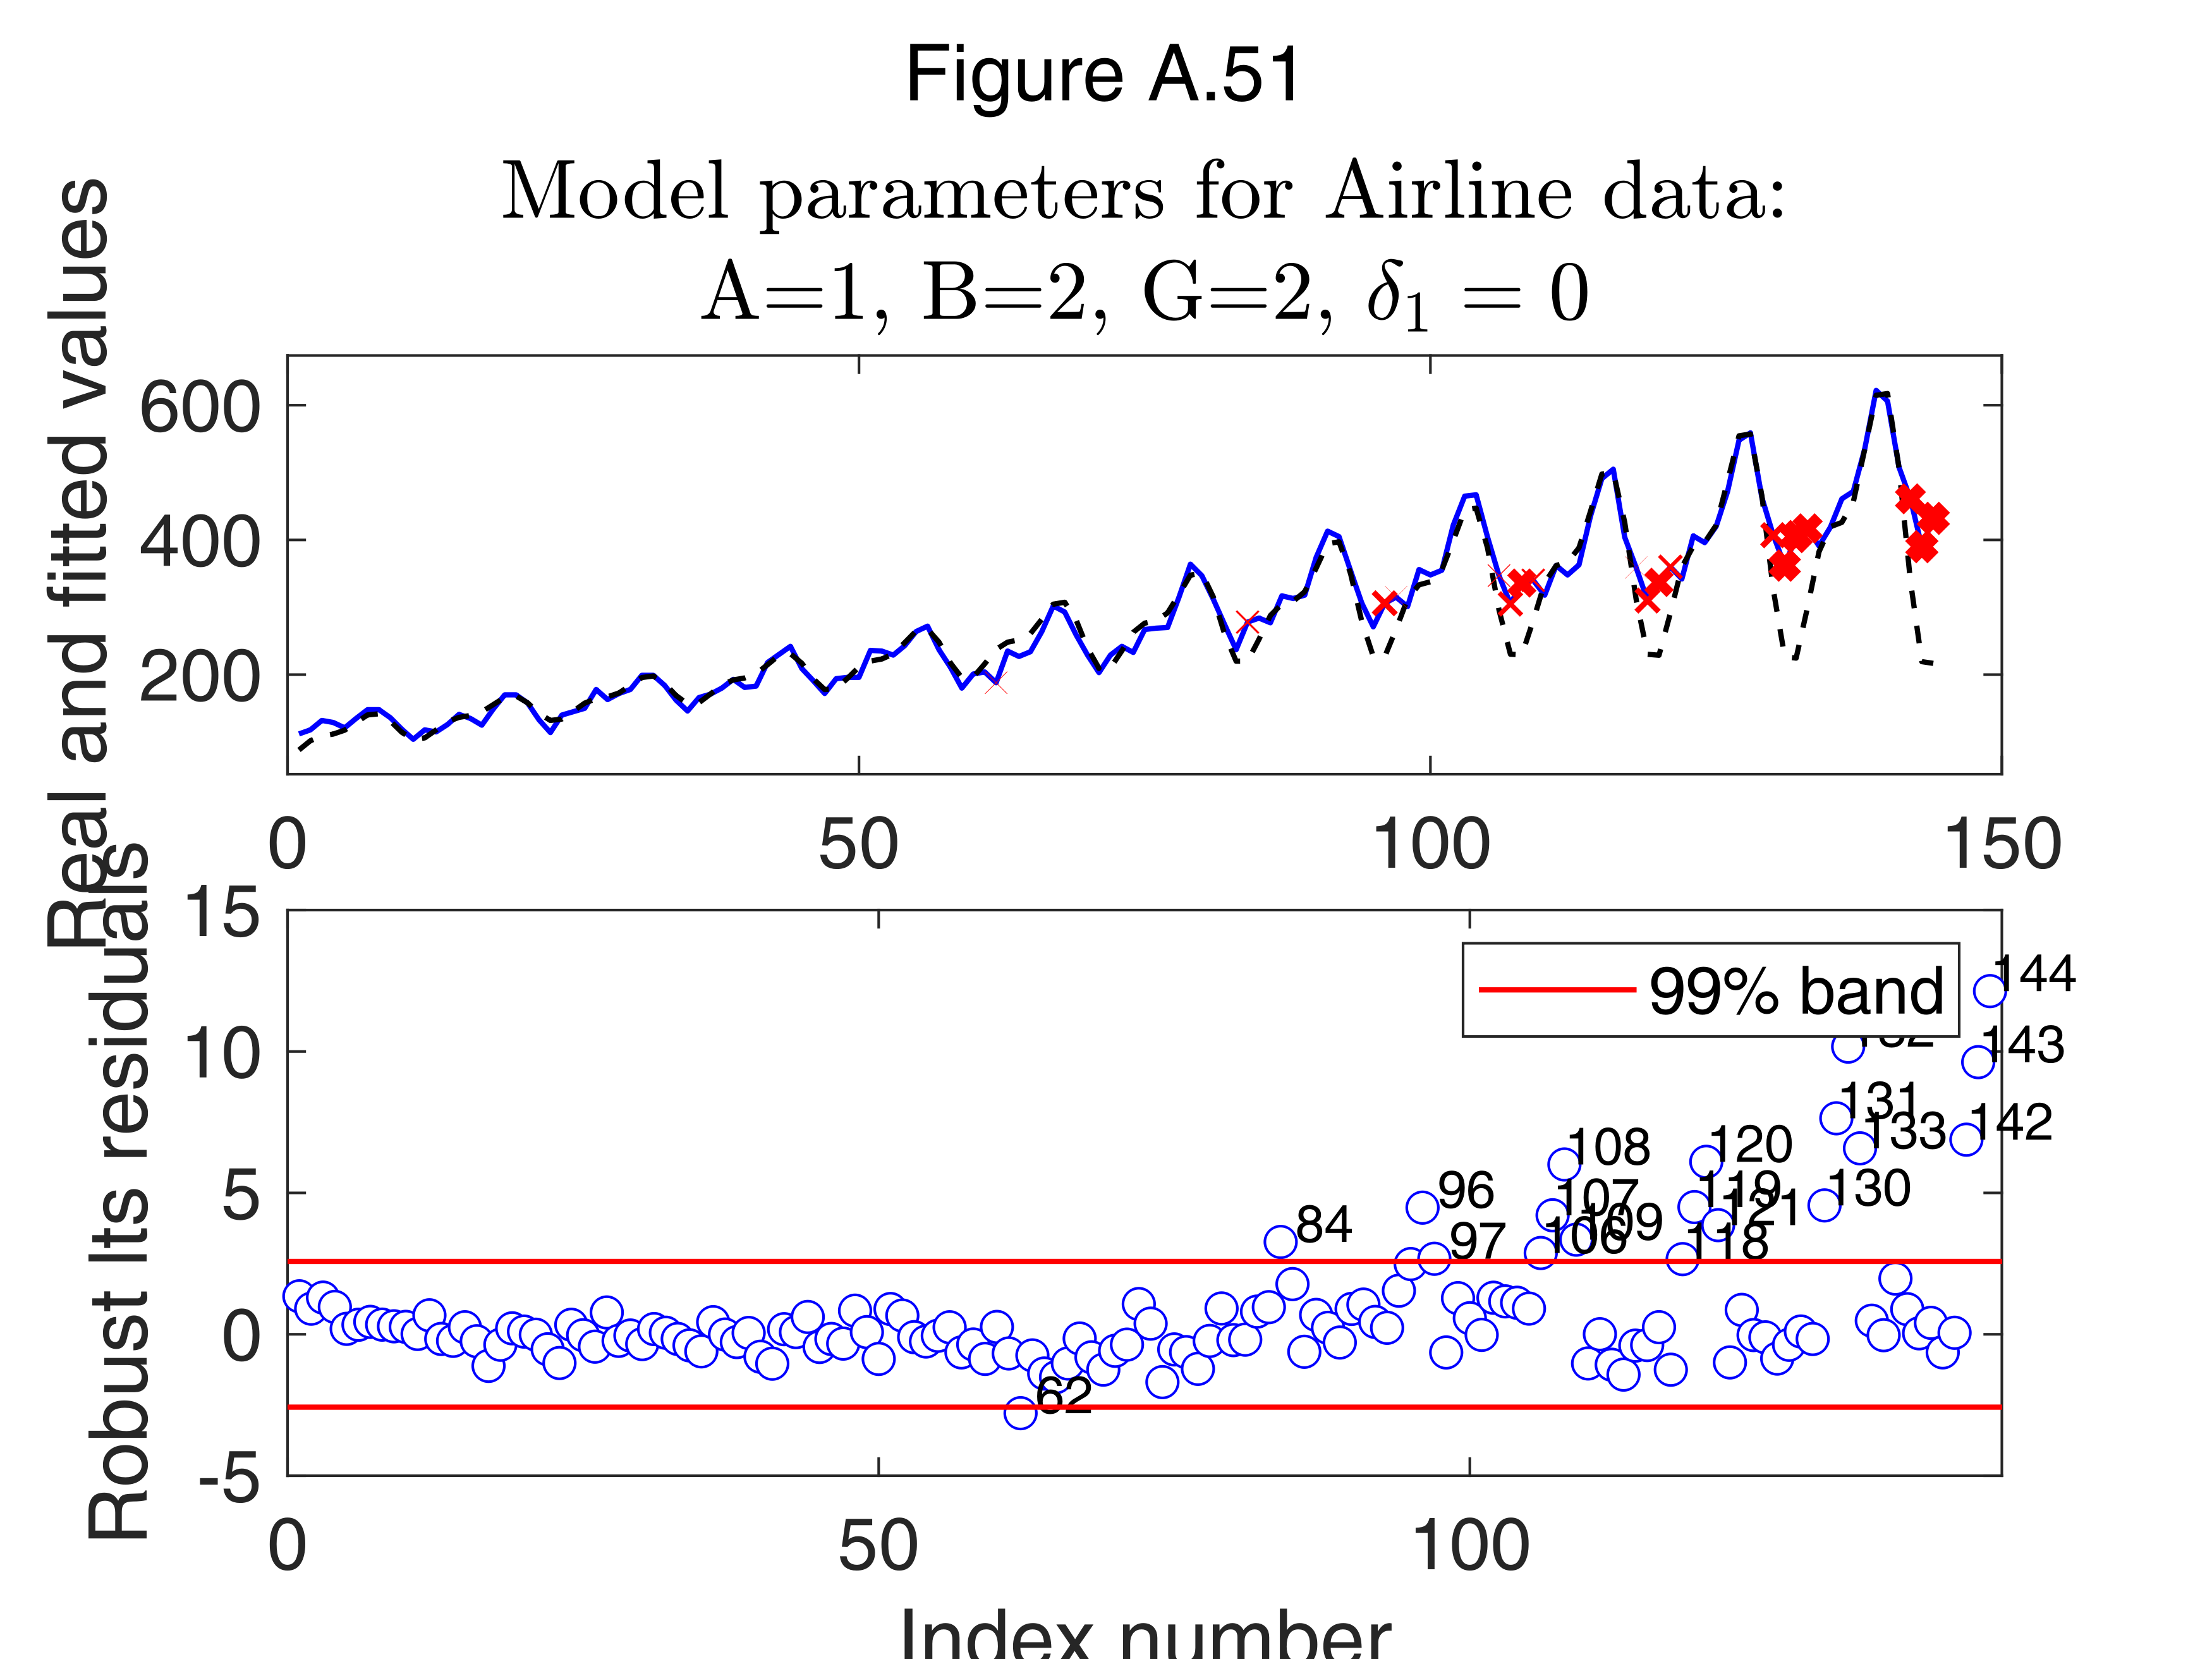

In [5]:
titl = {'Model parameters for Airline data:' , 'A=1, B=2, G=2,  !!!EQ_1!!! '};
title(findobj(gcf,'Tag','LTSts:ts'),titl,'interpreter','LaTeX','FontSize',16);

if prin==1
    % print to postscript
    print -depsc ch8_problem5_202.eps;
else
    sgtitle('Figure A.51')
    set(gcf,"Name",'Figure A.51')
end

## Create Figure A.52 (left panel)

Transform the data and go back to linear grow of amplitude


In [6]:
model.seasonal  = 102;
Ylog = log(Y);
outLTSlog102 = LTSts(Ylog,'model',model,'plots',1,'conflev',0.99,'msg',0,'dispresults',true);

                       Coeff                   SE                     t                    pval         
                ___________________    ___________________    _________________    _____________________
    b_trend1       4.81100553074743     0.0101960069881559     471.851925595588    7.38911736847785e-222
    b_trend2     0.0101403524125405    0.00012280600727783      82.572120349125    1.01015123800964e-118
    b_cos1       -0.101461018525318     0.0122711730893393    -8.26824116868368     1.05451610040039e-13
    b_sin1      -0.0354078698900533    0.00653451500121547    -5.41859187460235     2.62541096801257e-07
    b_cos2      -0.0165586888906845    0.00568653527045133    -2.91191175349383      0.00419514325556925
    b_sin2       0.0641081252834234    0.00901580424032939     7.11063856030233     5.81329766692002e-11
    b_varaml    0.00442830096406017    0.00183433646179961     2.41411597941836       0.0170941323769679


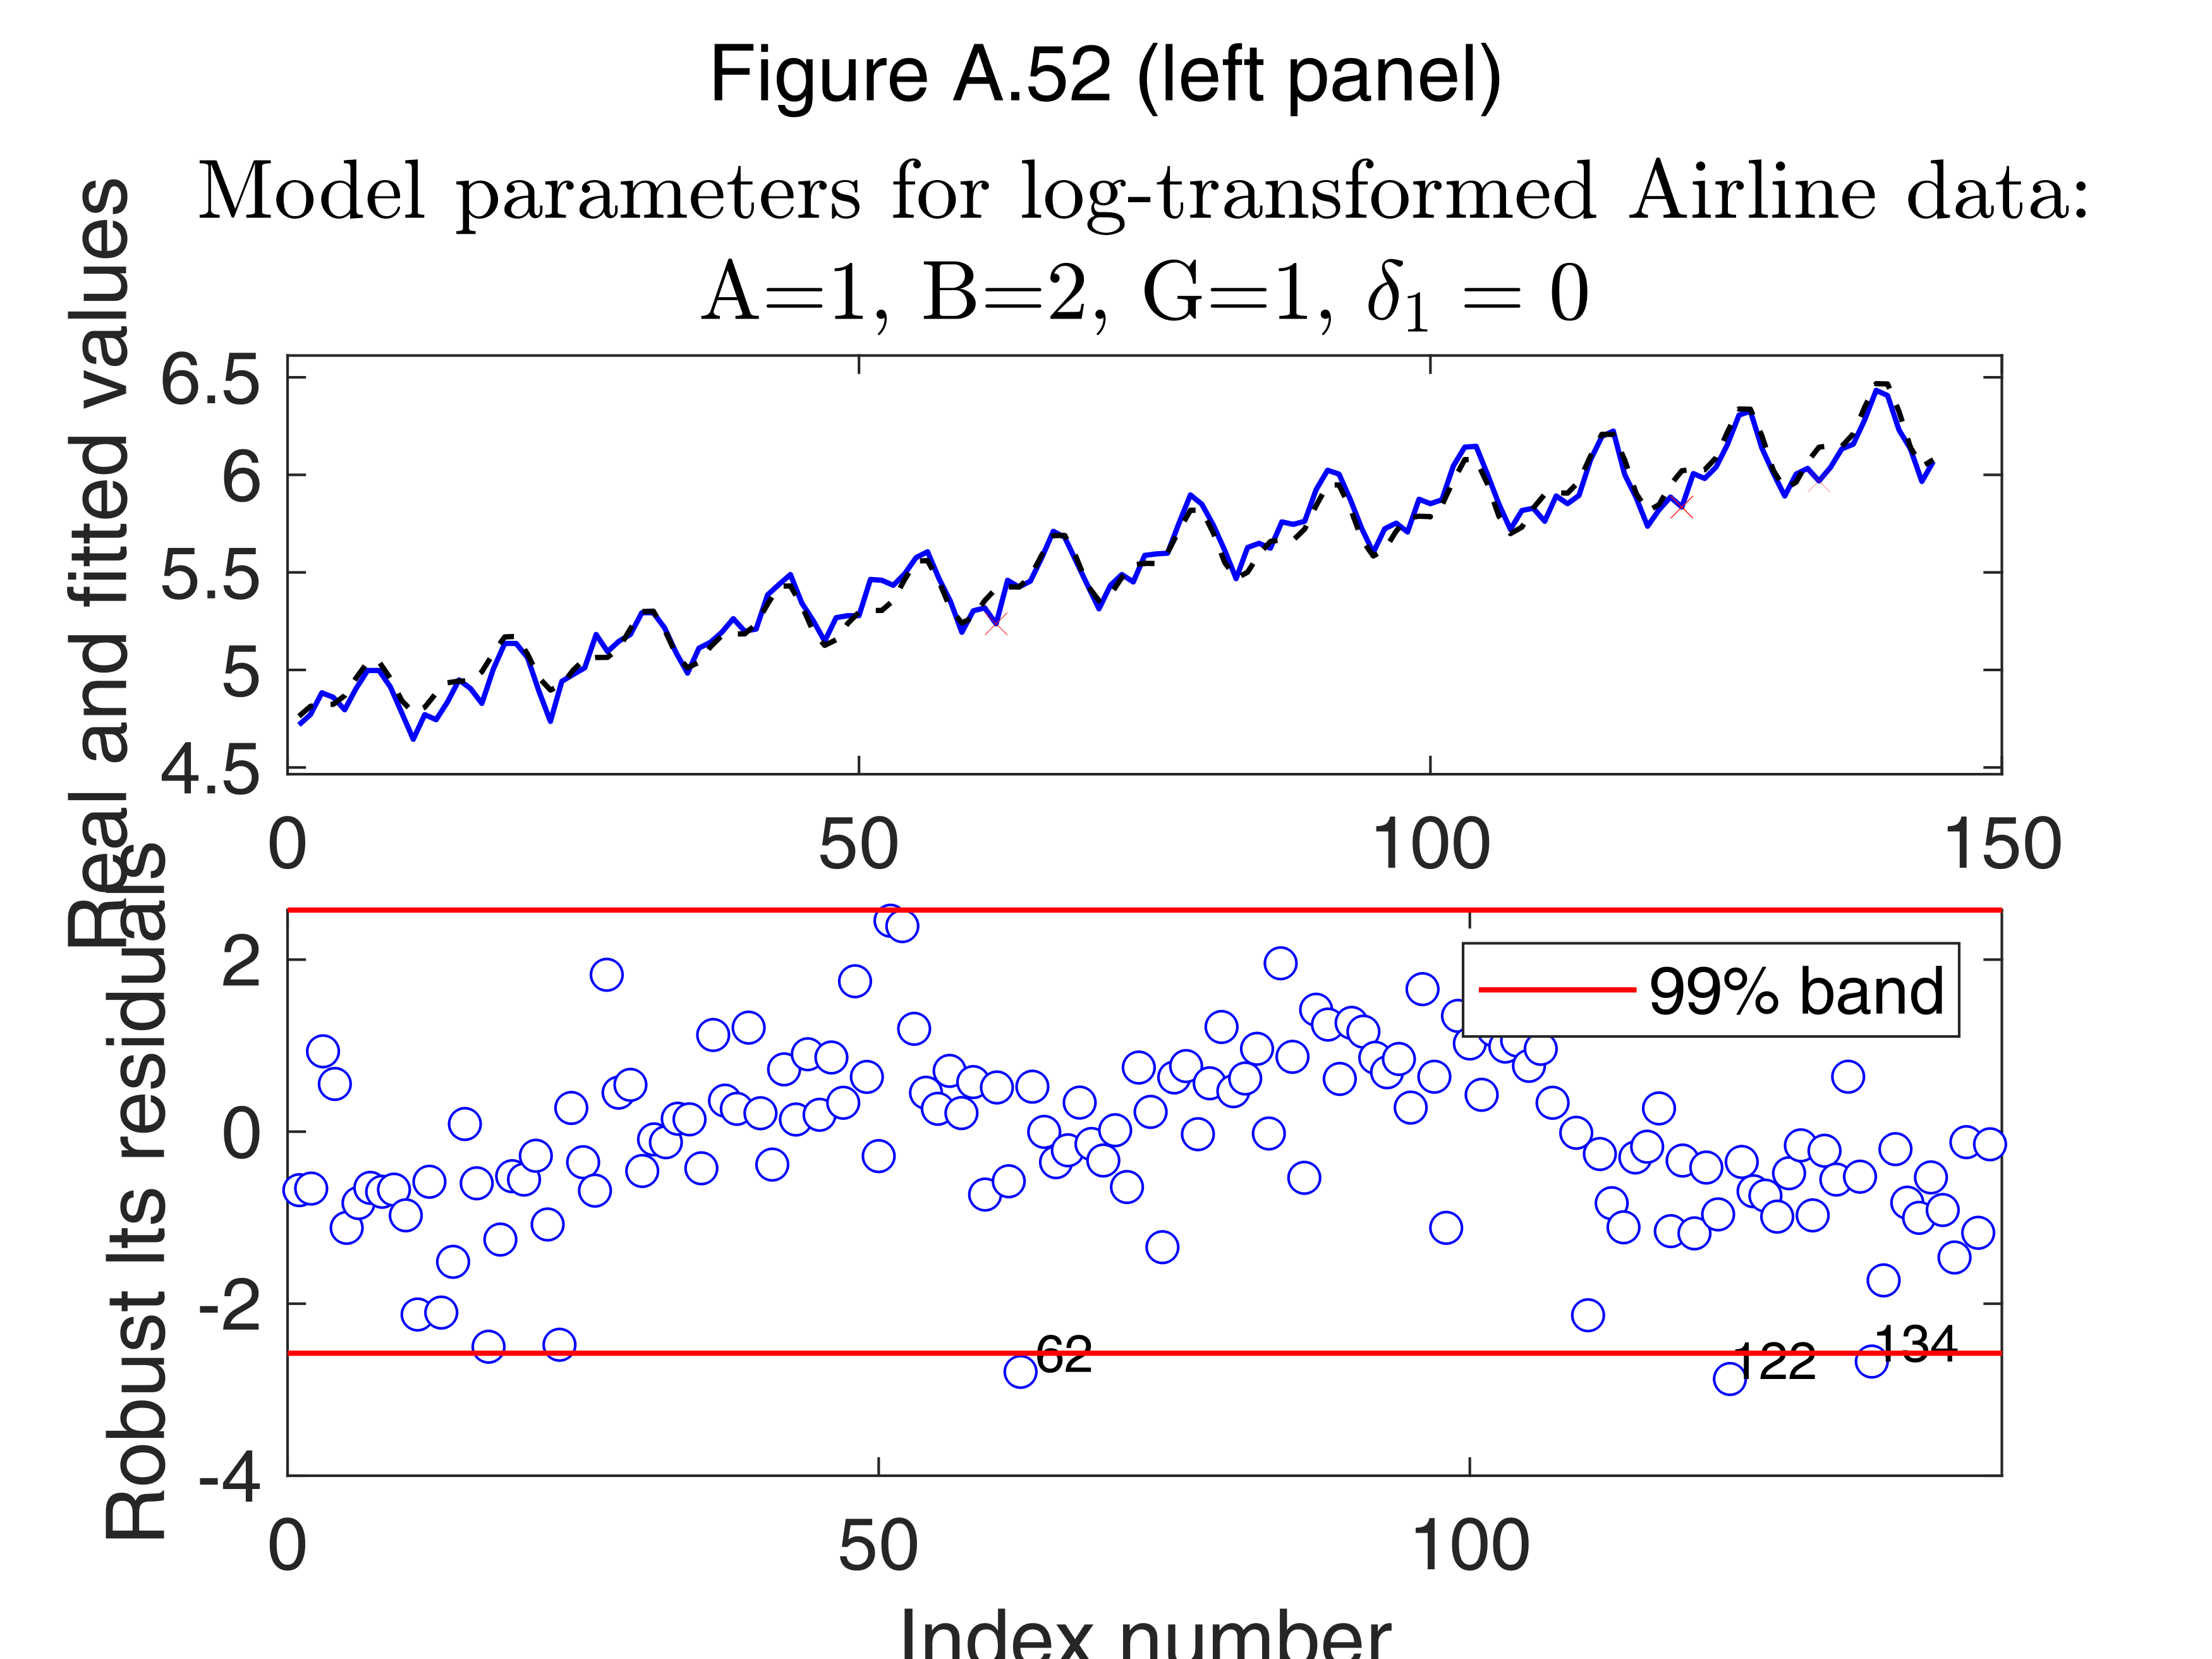

In [7]:
titl = {'Model parameters for log-transformed Airline data:' , 'A=1, B=2, G=1,  !!!EQ_1!!! '};
title(findobj(gcf,'Tag','LTSts:ts'),titl,'interpreter','LaTeX','FontSize',16);

if prin==1
    % print to postscript
    print -depsc ch8_problem5_log102;
else
    sgtitle('Figure A.52 (left panel)')
    set(gcf,"Name",'Figure A.52 (left panel)')
end

## Create Figure A.52 (right panel)

No grow of amplitude


In [8]:
model.seasonal  = 2;
outLTSlog2 = LTSts(Ylog,'model',model,'plots',1,'conflev',0.99,'msg',0,'dispresults',true);

                       Coeff                   SE                     t                    pval         
                ___________________    ___________________    _________________    _____________________
    b_trend1       4.81538516778463     0.0129541128454465     371.726356350006    5.78561026286335e-209
    b_trend2     0.0100420750114603    0.00015511179725806     64.7408848906135    3.77063209456433e-105
    b_cos1       -0.143961332949096    0.00909477111936274    -15.8290220896932     8.01683239132229e-33
    b_sin1       -0.048198702692804    0.00911185546485816     -5.2896693630285     4.69200310401645e-07
    b_cos2      -0.0215263885556261    0.00909477111936274    -2.36689722843013       0.0193270146713908
    b_sin2       0.0764516597533452    0.00909741617454604     8.40366740253698     4.74702553482123e-14


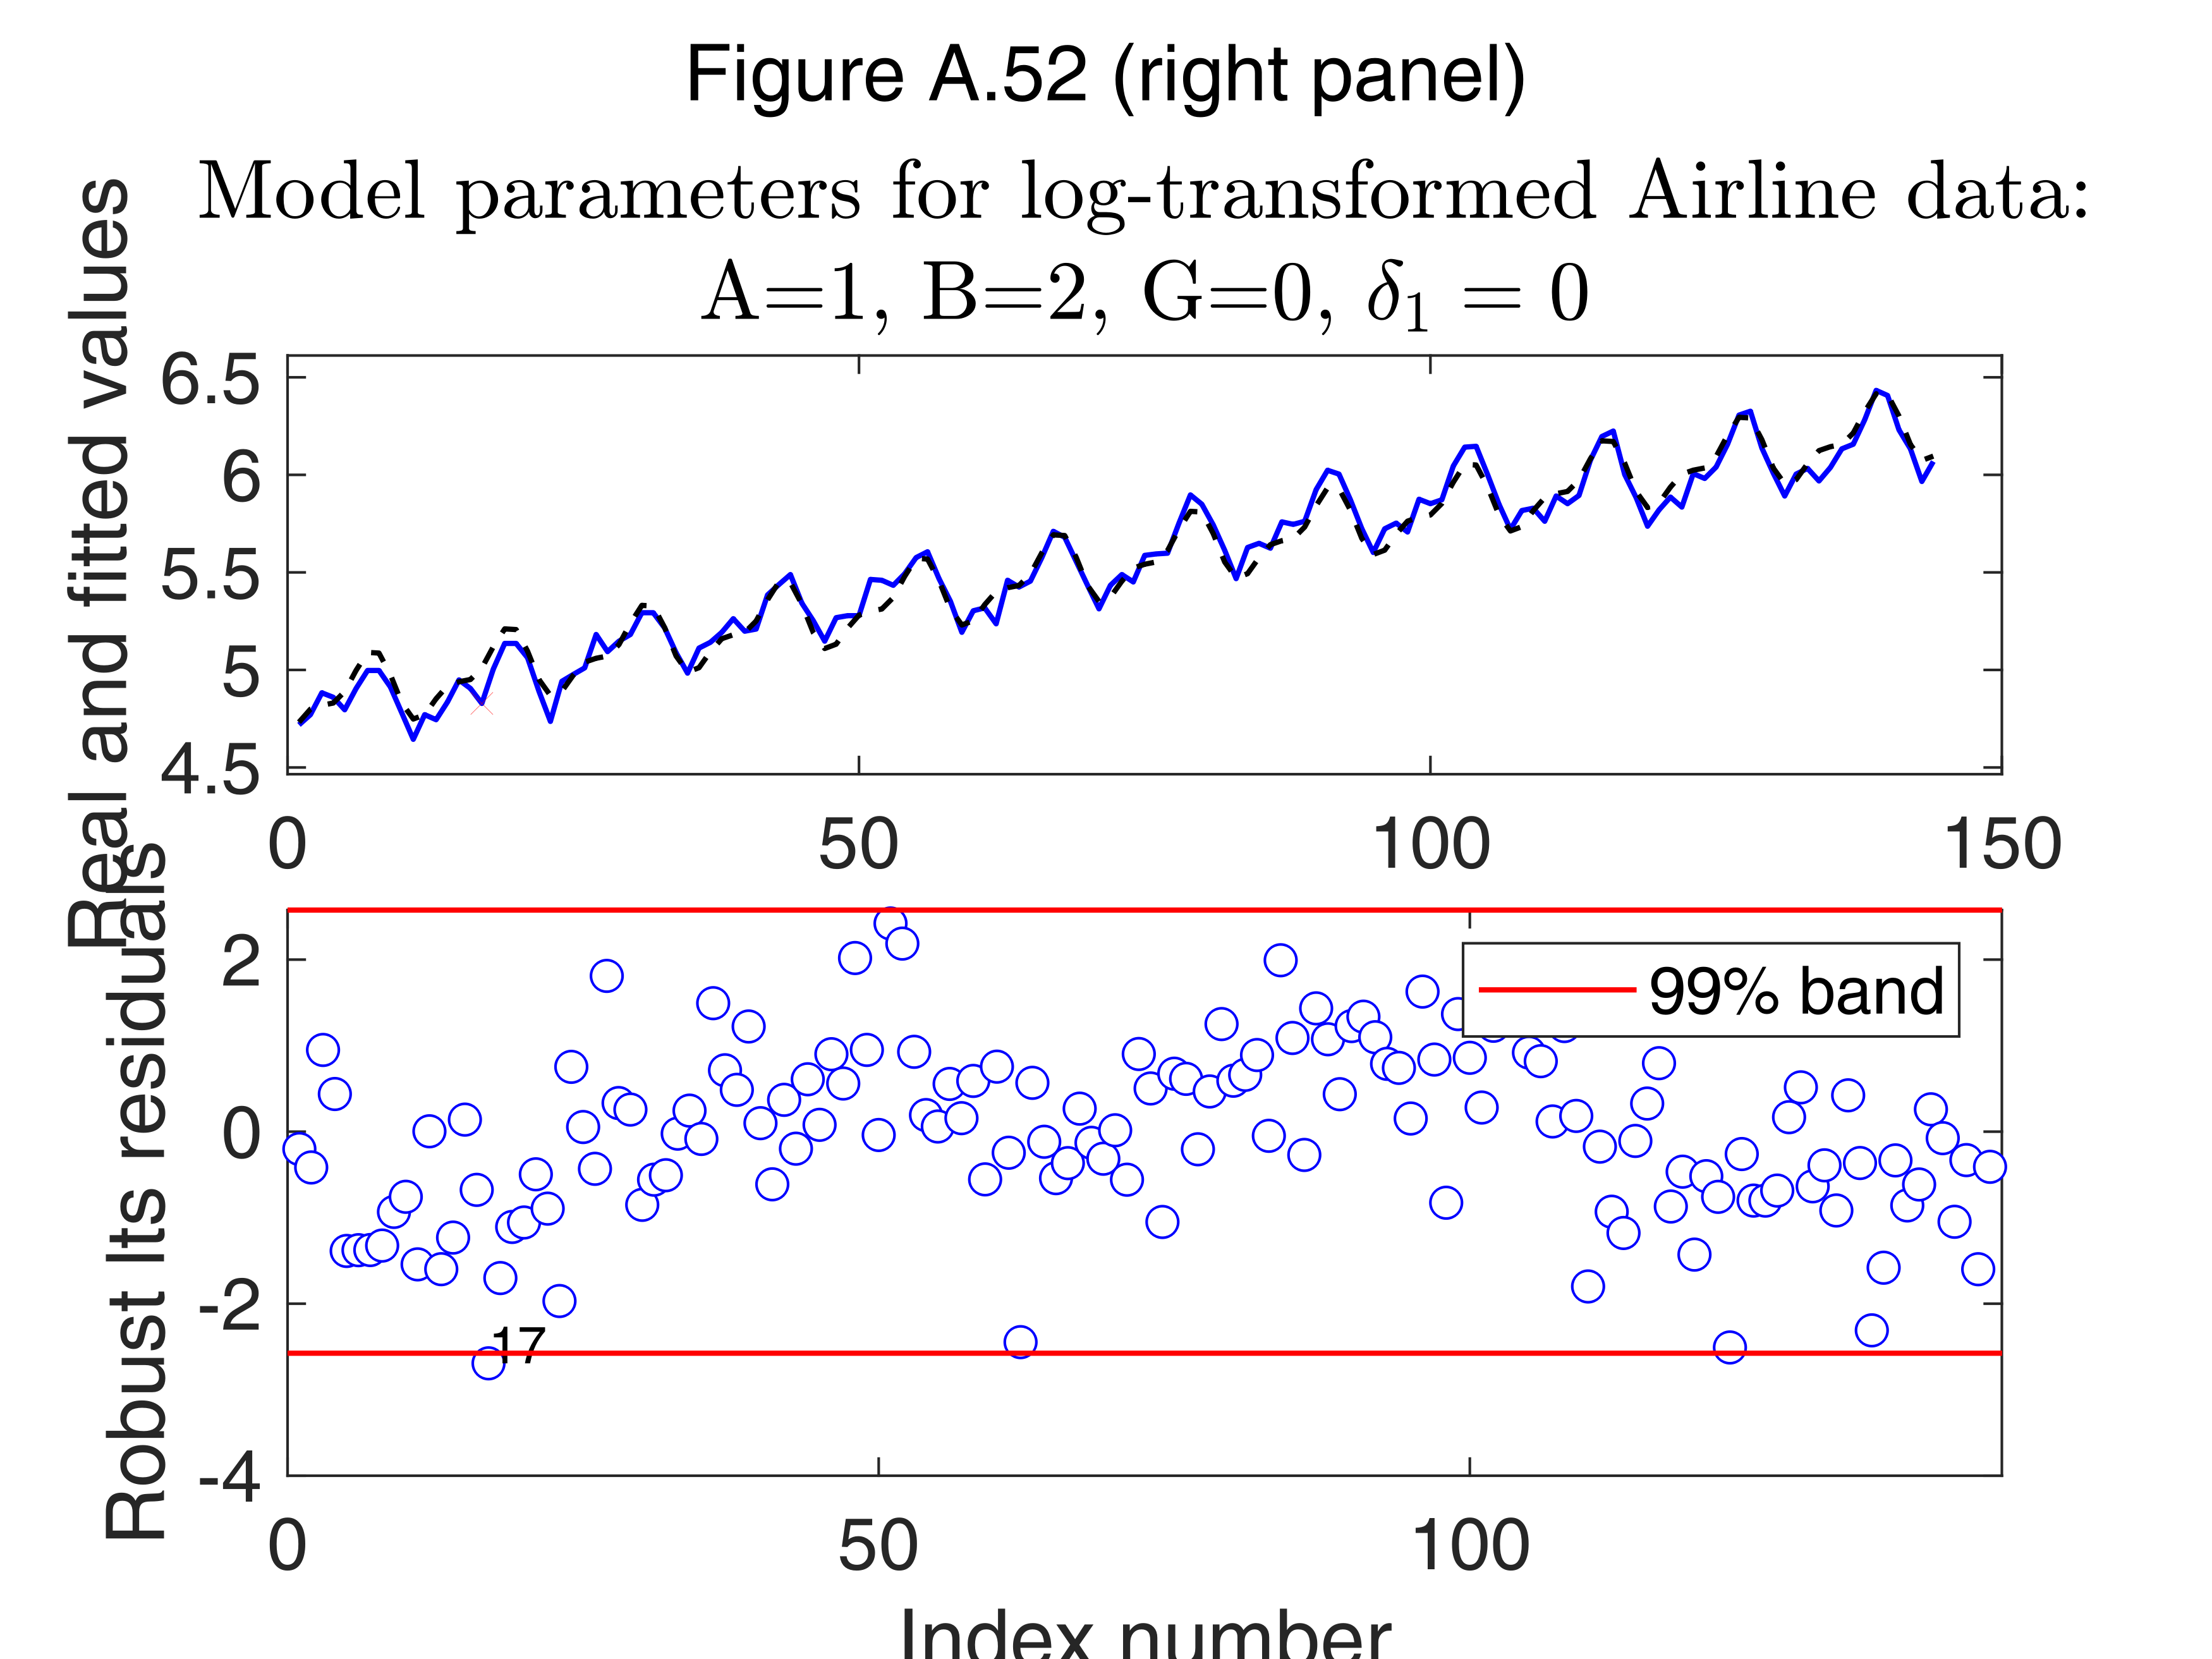

In [9]:
titl = {'Model parameters for log-transformed Airline data:' , 'A=1, B=2, G=0,  !!!EQ_1!!! '};
title(findobj(gcf,'Tag','LTSts:ts'),titl,'interpreter','LaTeX','FontSize',16);

if prin==1
    % print to postscript
    print -depsc ch8_problem5_log2
else
    sgtitle('Figure A.52 (right panel)')
    set(gcf,"Name",'Figure A.52 (right panel)')
end

In [10]:

%InsideREADME